In [109]:
import pandas as pd

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [38]:


df = pd.read_csv('breastcancer/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df.info() #Mostra os campos do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [43]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [42]:
df.diagnosis = df.diagnosis.replace('B', 0)
df.diagnosis = df.diagnosis.replace('M', 1)

In [44]:
x = df.loc[:, df.columns != 'diagnosis'] #Separa os parametros de entrada e de saída.
y = df.loc[:, df.columns == 'diagnosis']

In [72]:
os = SMOTE(random_state = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

os_data_x, os_data_y = os.fit_resample(x_train, y_train)

In [73]:
os_data_x = pd.DataFrame(os_data_x, columns=x_train.columns)
os_data_y = pd.DataFrame(os_data_y, columns=['diagnosis'])


In [74]:
os_data_y.value_counts()

diagnosis
0            249
1            249
dtype: int64

In [97]:
os_data_y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [76]:
data_final = os_data_x.merge(os_data_y, left_index=True, right_index=True)
data_final.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.15820,0.180400,0.09608,0.2664,0.07809,0
1,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,0
2,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,27.26,112.10,828.5,0.1153,0.34290,0.251200,0.13390,0.2534,0.07858,0
3,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,...,15.77,86.92,549.9,0.1521,0.16320,0.162200,0.07393,0.2781,0.08052,0
4,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,...,19.67,81.93,475.7,0.1415,0.21700,0.230200,0.11050,0.2787,0.07427,0


In [82]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())

In [83]:
rfe.support_ #Mostra quais os parametros importantes

array([ True, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False])

In [84]:
rfe.ranking_ #Quanto menor o ranking mais importante é o parametro

array([ 1,  7, 11, 14,  1,  1,  1,  1,  1, 13, 10,  1,  1, 12, 15,  4,  5,
        8,  9, 16,  1,  1,  1,  6,  3,  1,  1,  1,  1,  2])

In [95]:
(rfe.support_).tolist()+[True]

[True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True]

In [96]:
cols = data_final.columns[(rfe.support_).tolist()+[True]]
x = data_final[cols].drop(['diagnosis'], axis=1)
y = data_final['diagnosis']
cols

Index(['radius_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'texture_se', 'perimeter_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'diagnosis'],
      dtype='object')

In [98]:
smlr = sm.Logit(y, x)
result= smlr.fit()
print(result.summary())
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.065797
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  498
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                           14
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.9051
Time:                        19:46:17   Log-Likelihood:                -32.767
converged:                       True   LL-Null:                       -345.19
Covariance Type:            nonrobust   LLR p-value:                2.736e-124
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
radius_mean             -3.7566      1.021     -3.680      0.000      -5.757      -1.75

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [101]:
y_pred = logreg.predict(x_test)

In [102]:
logreg.score(x_test, y_test) #Acurácia

0.96

In [104]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.99      0.94      0.96        78

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



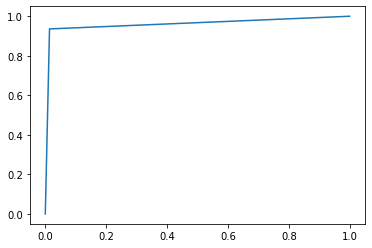

In [110]:
roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr)
plt.show()

In [111]:
mc = metrics.confusion_matrix(y_test, y_pred)
print(mc)

[[71  1]
 [ 5 73]]


Text(33.0, 0.5, 'True')

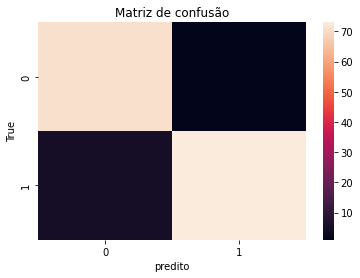

In [113]:
import seaborn as sns

sns.heatmap(mc)
plt.title("Matriz de confusão")
plt.xlabel("predito")
plt.ylabel("True")